## Abhishek soni
## Contact:
9875228139, 
abhishekajt@gmail.com

In [1]:
import pandas as pd
import numpy as np

# EDA

In [2]:
df = pd.read_csv('taskdata.csv')
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [3]:
def details(df):
  print("Description of training set")
  print("Shape: \t\t\t", df.shape)
  print("#NaNs: \t\t\t", df.isna().sum().sum()) 
  
details(df)

Description of training set
Shape: 			 (4407, 17)
#NaNs: 			 7


In [4]:
# Location of the NAN
print(df.loc[pd.isna(df[df.columns[1]]), :].index)

Int64Index([764, 1002, 2276, 3792, 3967, 4148, 4259], dtype='int64')


In [5]:
df.dropna(inplace=True)
details(df)

Description of training set
Shape: 			 (4400, 17)
#NaNs: 			 0


In [6]:
def description(df):
  print("#Number of Unique Accounts: \t\t", df.account_id.nunique())
  print("Revenue range from: \t", df.total_revenue.min(), " to ", df.total_revenue.max())
  print("Maximum return day: \t", df.max_return_days.max())

description(df)

#Number of Unique Accounts: 		 15
Revenue range from: 	 0.0  to  43957.1727
Maximum return day: 	 354


## Heat Map for DATA correlation

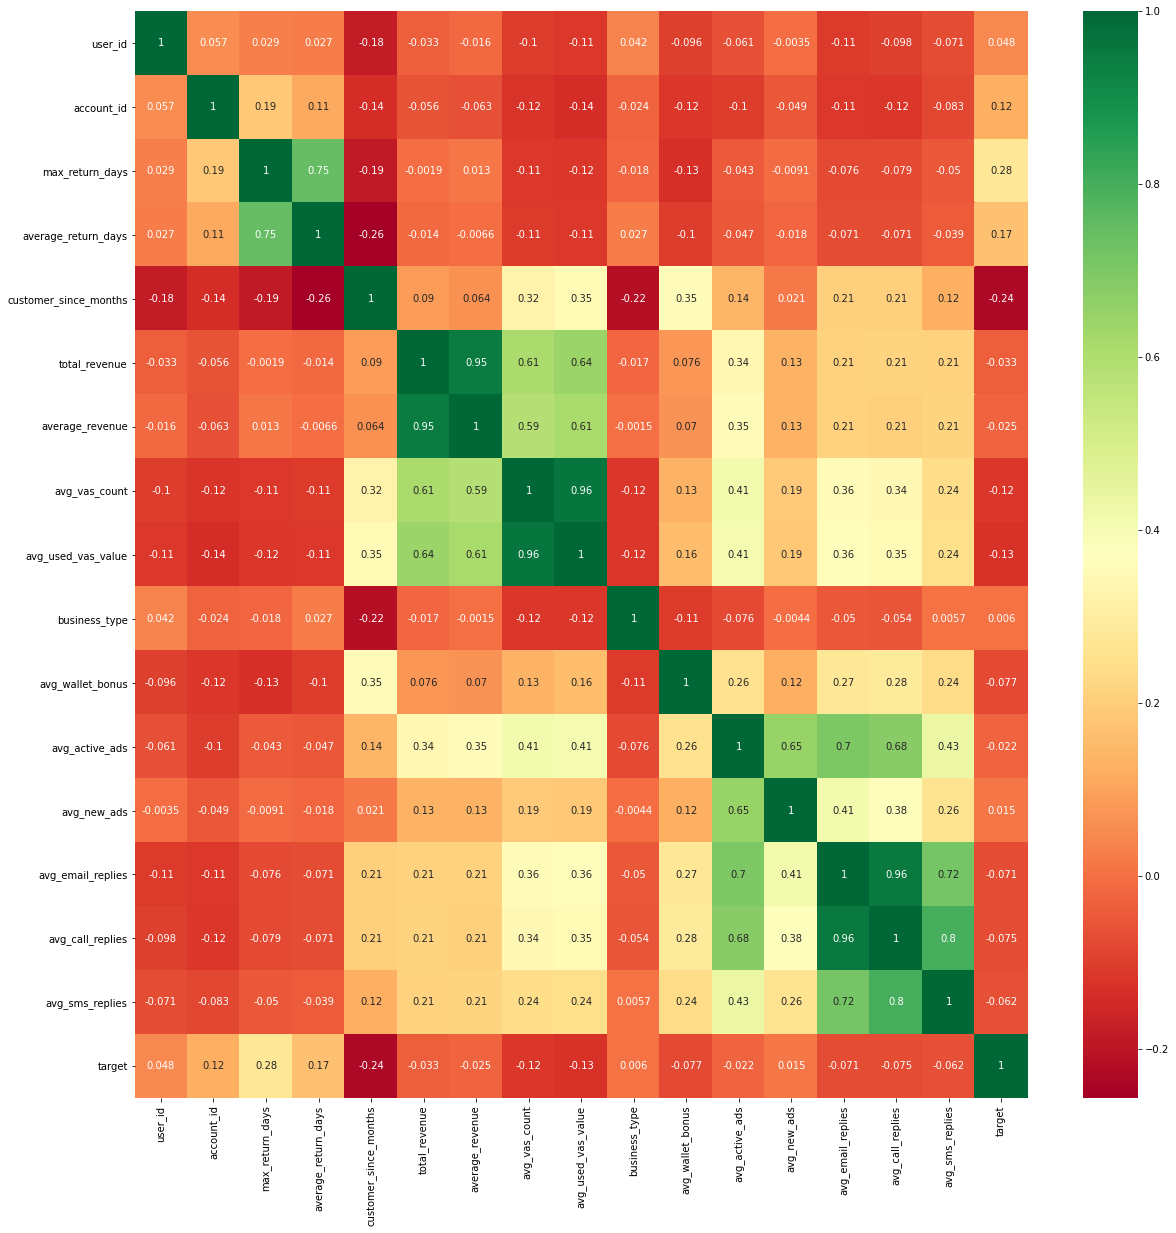

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
features = [ 'average_return_days',
       'customer_since_months', 'average_revenue',
        'avg_used_vas_value', 'business_type',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies']
len(features)

11

# Data Preprocessing

## Normalising the Data

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
def normalize(df,features):
  mms = MinMaxScaler(feature_range=(-1,1))
  data = pd.DataFrame(data = df[features], columns=features)
  data[features] = mms.fit_transform(data[features])
  return data


In [11]:
data = normalize(df,features)
data.head()

,average_return_days,customer_since_months,average_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies
0,-0.994342,0.130435,-1.0,-0.960288,-1.0,-0.961554,-0.982723,-0.988296,-0.962227,-0.967972,-0.965839
1,-0.956436,-0.217391,-1.0,-0.932092,-1.0,-1.000000,-0.949455,-0.985955,-0.981123,-0.984168,-1.000000
2,-0.994154,0.217391,-1.0,-0.936461,-1.0,-0.980777,-0.988004,-0.997122,-0.976404,-0.971892,-1.000000
3,-0.997171,0.130435,-1.0,-0.895068,-1.0,-0.810207,-0.910814,-0.938013,-0.898087,-0.933900,-1.000000
4,-0.997171,0.478261,-1.0,-0.934933,-1.0,-0.994682,-0.989497,-0.998701,-0.979653,-0.970436,-0.968466


In [12]:
data['target']= df['target']
data.head()

,average_return_days,customer_since_months,average_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,-0.994342,0.130435,-1.0,-0.960288,-1.0,-0.961554,-0.982723,-0.988296,-0.962227,-0.967972,-0.965839,0
1,-0.956436,-0.217391,-1.0,-0.932092,-1.0,-1.000000,-0.949455,-0.985955,-0.981123,-0.984168,-1.000000,0
2,-0.994154,0.217391,-1.0,-0.936461,-1.0,-0.980777,-0.988004,-0.997122,-0.976404,-0.971892,-1.000000,0
3,-0.997171,0.130435,-1.0,-0.895068,-1.0,-0.810207,-0.910814,-0.938013,-0.898087,-0.933900,-1.000000,1
4,-0.997171,0.478261,-1.0,-0.934933,-1.0,-0.994682,-0.989497,-0.998701,-0.979653,-0.970436,-0.968466,0


## Spliting the Data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X, X_test = train_test_split(
...     data, test_size=0.15, random_state=42)

y, y_test = X['target'], X_test['target'] 
########################################################
X_train, X_val= train_test_split(
...     X, test_size=0.15, random_state=42)

y_train, y_val = X_train['target'], X_val['target'] 
########################################################

X_train= X_train.drop('target',1)
X_val  = X_val.drop('target',1)
X_test = X_test.drop('target',1)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape,  y_test.shape

((3179, 11), (3179,), (561, 11), (561,), (660, 11), (660,))

In [16]:
X_train

,average_return_days,customer_since_months,average_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies
2030,-0.802546,-0.652174,-1.000000,-0.988086,-1.0,-1.000000,-0.984799,-0.995549,-0.972268,-0.955715,-1.000000
3963,-0.974540,-0.391304,-1.000000,-0.993381,-1.0,-1.000000,-0.997508,-0.996333,-0.999223,-0.996176,-1.000000
1946,-0.997171,0.043478,-1.000000,-0.957386,-1.0,-0.965399,-0.997856,-0.997934,-0.970600,-0.978996,-0.978978
4002,-0.997171,-0.391304,-1.000000,-0.952345,0.2,-0.975651,-0.998606,-0.998158,-0.996970,-0.997476,-1.000000
758,-0.997171,0.304348,-0.980773,-0.881780,-1.0,-0.966681,-0.972041,-0.989256,-0.941470,-0.915896,-0.968466
...,...,...,...,...,...,...,...,...,...,...,...
3425,-0.994125,0.043478,-1.000000,-0.990377,-0.6,-0.988851,-0.997420,-0.998583,-0.989871,-0.984203,-0.968466
231,-0.997171,0.130435,-1.000000,-0.939974,-1.0,-0.948739,-0.974454,-0.987839,-0.918972,-0.901070,-1.000000
176,-0.871759,-0.043478,-1.000000,-1.000000,-1.0,-0.961554,-0.989710,-0.996738,-0.973345,-0.973039,-0.982919
3070,-0.913563,-0.304348,-1.000000,-0.980144,-0.6,-1.000000,-0.991894,-0.996845,-0.983428,-0.975780,-1.000000


# XGBoost

In [17]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import xgboost

In [18]:
classifier=xgboost.XGBClassifier()

Random Search Will take in all the values we defined for parameters the parameters and take the best among those

In [19]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [20]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [21]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [22]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.15,
 'max_depth': 4,
 'min_child_weight': 1}

In [23]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Copying the above parameters which was classified to be best for the given dataset

In [24]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

## Predictions

In [25]:
classifier.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-error:0.09697
[1]	validation_0-error:0.084848
[2]	validation_0-error:0.086364
[3]	validation_0-error:0.089394
[4]	validation_0-error:0.086364
[5]	validation_0-error:0.093939
[6]	validation_0-error:0.095455
[7]	validation_0-error:0.090909
[8]	validation_0-error:0.092424
[9]	validation_0-error:0.090909
[10]	validation_0-error:0.092424
[11]	validation_0-error:0.092424
[12]	validation_0-error:0.093939
[13]	validation_0-error:0.095455
[14]	validation_0-error:0.095455
[15]	validation_0-error:0.093939
[16]	validation_0-error:0.095455
[17]	validation_0-error:0.093939
[18]	validation_0-error:0.093939
[19]	validation_0-error:0.093939
[20]	validation_0-error:0.093939
[21]	validation_0-error:0.093939
[22]	validation_0-error:0.093939
[23]	validation_0-error:0.093939
[24]	validation_0-error:0.095455
[25]	validation_0-error:0.092424
[26]	validation_0-error:0.092424
[27]	validation_0-error:0.092424
[28]	validation_0-error:0.092424
[29]	validation_0-error:0.090909
[30]	validation_0-err

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [26]:
ytrain_pred = classifier.predict(X_train)
ytest_pred = classifier.predict(X_test)

In [27]:
print('Training Errors')
print('Mean Squared Error:', mean_squared_error(y_train, ytrain_pred ))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, ytrain_pred )))

Training Errors
Mean Squared Error: 0.06731676627870399
Root Mean Squared Error: 0.2594547480365391


In [28]:
print('Train Accuracy : ',accuracy_score(y_train, ytrain_pred))
print('Test Accuracy : ',accuracy_score(y_test, ytest_pred))

Train Accuracy :  0.932683233721296
Test Accuracy :  0.9075757575757576


## Feature Importance Analysis

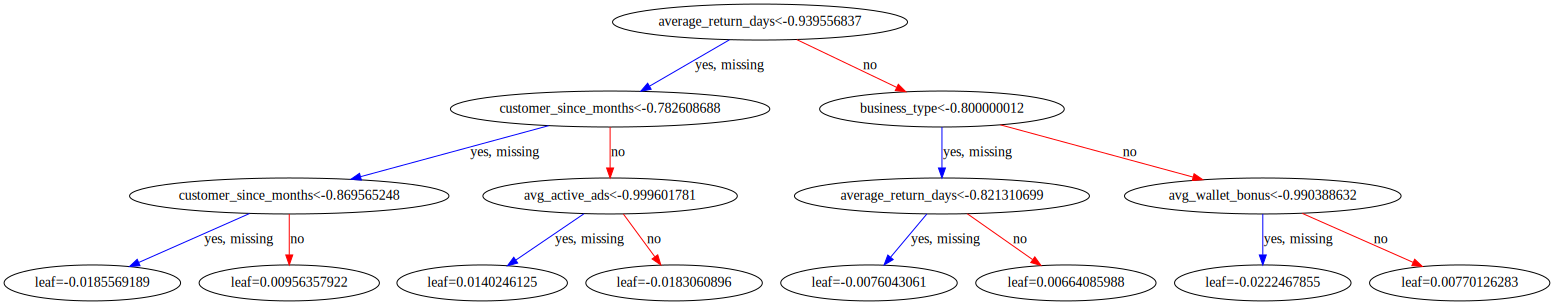

In [64]:
import graphviz

xgb_model = xgboost.XGBClassifier(objective="reg:squarederror", random_state=42, eval_metric="auc")


xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)

# converts the target tree to a graphviz instance
xgboost.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)

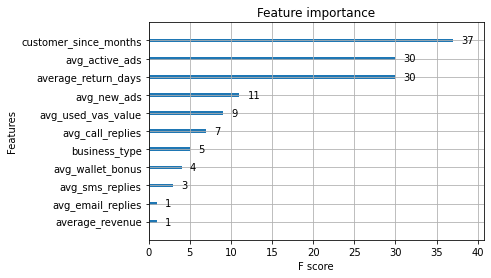

In [63]:
xgboost.plot_importance(xgb_model)

In [60]:
X_train.iloc[5]

average_return_days     -0.997171
customer_since_months    0.043478
average_revenue         -1.000000
avg_used_vas_value      -1.000000
business_type           -1.000000
avg_wallet_bonus        -0.987185
avg_active_ads          -0.998515
avg_new_ads             -0.998674
avg_email_replies       -0.995975
avg_call_replies        -0.995932
avg_sms_replies         -1.000000
Name: 3631, dtype: float64

## By Using SHAP values 

In [66]:
pip install shap

     |████████████████████████████████| 327kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456447 sha256=ee7cc599b1b7ea12f4cfdd7eb8b72541777ca7895f0559717f785b26afca991c
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [68]:
import shap

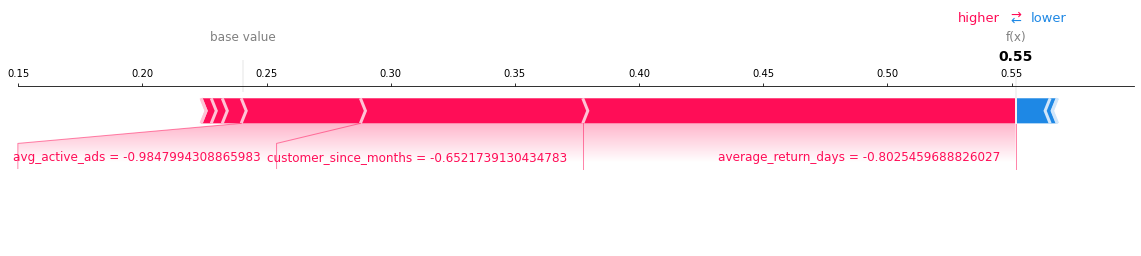

In [71]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:],matplotlib=True)

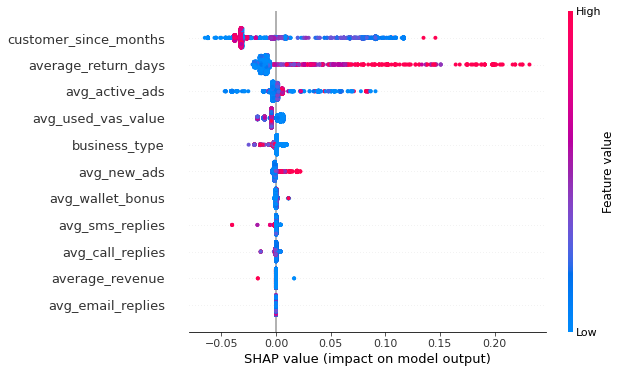

In [73]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

# Using Deep Learning (Pytorch)

## Libraries

In [43]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
from datetime import datetime

## Dataset Genearator

In [44]:
class Dataset_gen(Dataset):
    def __init__(self, X, Y):
        self.x = X
        self.y = Y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
      if isinstance(idx, torch.Tensor):
            idx = idx.tolist()
      return self.x[idx], self.y[idx]

In [45]:
train_data = Dataset_gen(torch.FloatTensor(X_train.values), torch.FloatTensor(y_train.values))
test_data = Dataset_gen(torch.FloatTensor(X_test.values), torch.FloatTensor(y_test.values))

## Model

In [46]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Number of input features is 11.
        self.layer_1 = nn.Linear(11, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [47]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Defining Network Parameters

In [48]:
model = Network()
model.to(device)

Network(
  (layer_1): Linear(in_features=11, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [49]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

In [50]:
train_loader = DataLoader(dataset=train_data, batch_size=len(X_train), shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=len(X_test), shuffle=True)

## Training

In [51]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [52]:
model.train()
for e in range(1, 10+1):
    epoch_loss = 0
    epoch_acc = 0
    for data, target_label in train_loader:
        data, target_label = data.to(device), target_label.to(device)
        optimizer.zero_grad()
        
        y_pred = model(data)
        
        loss = criterion(y_pred, target_label.unsqueeze(1))
        acc = binary_acc(y_pred, target_label.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.77298 | Acc: 45.000
Epoch 002: | Loss: 0.73024 | Acc: 66.000
Epoch 003: | Loss: 0.66611 | Acc: 66.000
Epoch 004: | Loss: 0.62939 | Acc: 69.000
Epoch 005: | Loss: 0.61970 | Acc: 80.000
Epoch 006: | Loss: 0.59857 | Acc: 83.000
Epoch 007: | Loss: 0.57919 | Acc: 81.000
Epoch 008: | Loss: 0.56023 | Acc: 80.000
Epoch 009: | Loss: 0.53985 | Acc: 79.000
Epoch 010: | Loss: 0.52228 | Acc: 79.000


In [53]:
y_pred_list = []
for data, target_label in test_loader:
        data, target_label = data.to(device), target_label.to(device)
        
        y_pred = model(data)
        
        y_test_pred1 = model(data)
        y_test_pred = torch.sigmoid(y_test_pred1)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.extend(y_pred_tag.cpu().detach().numpy())

        acc = binary_acc(y_test_pred1, target_label.unsqueeze(1))

        
print('Accuracy on Test Data :', acc.item())

Accuracy on Test Data : 86.0


## Analysing the Result

In [54]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [55]:
confusion_matrix(y_test, y_pred_list)

array([[532,  66],
       [ 50,  12]])